
# Project: Investigate a Medical Appointment No Shows 2016 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/xing-huanggao/Desktop/Undefined/data_analysis/unit2/project2/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Check first few rows of this dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# determine the number of rows and columns
df.shape

(110527, 14)

In [5]:
# print information about this dataframe including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# confirm if the dataset contains any duplicate values
df.duplicated().sum()

0

In [7]:
# determine any null and empty values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

####  General properties about this data set
- Consist of 110527 rows and 14 columns
- Zero duplicated and empty values

### Fix the column labels
- Convert to lower case from upper case
- Change the column headers
- Validate if all these changes are completed

In [8]:
# convert all the column head labels to lowercase
df.columns = df.columns.str.lower()

In [9]:
# change column header
new_label = ['patient_id', 'appoint_id','gender','schedule_day','appoint_day', 'age','neighbour', 'scholarship','hypertension','diabetes','alcoholism','handcap','sms','no_show']
df.columns = new_label

In [10]:
# confirm if the conversion from uppercase to lower case is completed
df.columns

Index(['patient_id', 'appoint_id', 'gender', 'schedule_day', 'appoint_day',
       'age', 'neighbour', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handcap', 'sms', 'no_show'],
      dtype='object')

### Change the data type in this data set
- Both`scheduled_day` and `appoint_day` are object, we will change the data type to datetime by pandas ```to_datetime``` function.
- Convert `patient_id` and `appoint_id` to object, because both of them are numeric.

In [11]:
# convert schedulle_day and appoint_day to datetime format
df[['schedule_day','appoint_day']]= df[['schedule_day','appoint_day']].apply(pd.to_datetime)

In [12]:
# confirm the first few rows of converted columns
df[['schedule_day','appoint_day']].head()

,schedule_day,appoint_day
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [13]:
# convert patient_id and appoint_id to object
df[['patient_id','appoint_id']] = df[['patient_id','appoint_id']].astype('object')

### Data Cleaning (drop off the patient with age -1 from the data set)

### General statistics from this data set

In [14]:
# determin general statistics including mean, dispersion and shape of a dataset’s distribution
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min age of patients is -1, thus we have to remove it prior to dig deeply in the data set.

In [15]:
# identiy the index of -1 age patient, then drop it
df.drop(df.query('age == -1').index, inplace=True)

In [16]:
#confirm the patient data with -1 age has been removed.
df[df.age==-1]

,patient_id,appoint_id,gender,schedule_day,appoint_day,age,neighbour,scholarship,hypertension,diabetes,alcoholism,handcap,sms,no_show


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many paitents visited the hosipital with mutiple times ?)

We make a pie chart with matplotlib to show the distribution between the patients with 1 time (unique) and mutiple visits.

In [17]:
# count the number of patients with one time visit
uniq_patient = df.patient_id.nunique()

In [18]:
# count total number of visits
mutiple_visit_patient = df.patient_id.count() - uniq_patient

In [19]:
mutiple_visit_patient

48228

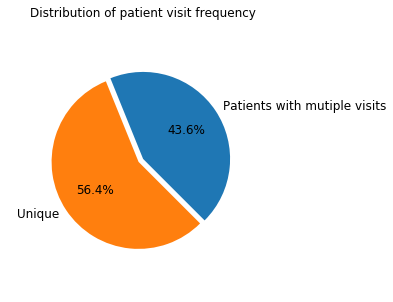

In [20]:
#make a pie chart with matplotlib to show the distribution between the patien
labels = ['Patients with mutiple visits', 'Unique']
sizes = [mutiple_visit_patient, uniq_patient]

# set up the size of subplot figure
fig1,ax1 = plt.subplots(figsize=(5,5))

# Use a zero explode and turn of the shadow for better visibility
ax1.pie(sizes, explode=(0,0.05), labels=labels, startangle=-45,shadow=False, radius=0.8,textprops={'size': 'larger'},autopct='%1.1f%%');
ax1.title.set_text('Distribution of patient visit frequency')

In [21]:
# identify the patient with higest visting numbers
df.patient_id.value_counts().head(1)

8.221459e+14    88
Name: patient_id, dtype: int64

#### Conclution 1
About 43% of total patients visited the hosiptial for mutiple times.

### Research Question 2  (It exists a correlation between patient with the scholarship and no-show frequence?)

In [22]:
# group no_show data and determine the average values
df.groupby(['no_show'],as_index=False).mean()

,no_show,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms
0,No,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337
1,Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


In [23]:
# select the patient with the scholarship, then determin the no-show frequence
scholar = df.query('scholarship ==1').no_show.value_counts(1) *100

In [24]:
scholar

No     76.263696
Yes    23.736304
Name: no_show, dtype: float64

In [25]:
# select the patient without the scholarship, then determin the no-show frequence
non_scholar = df.query('scholarship ==0').no_show.value_counts(1)*100

In [26]:
non_scholar

No     80.192645
Yes    19.807355
Name: no_show, dtype: float64

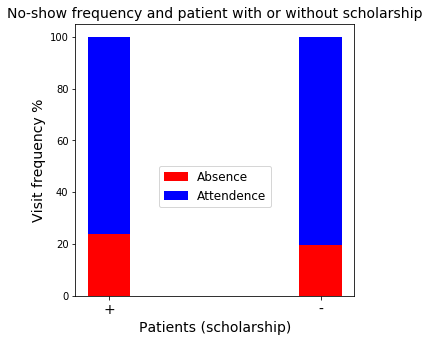

In [27]:
# creat a stacked bar plot to visulize the two groups of patients( with and without the scholarship)
head = ['Absence','Attendence']
show = (scholar['No'], non_scholar['No'])
no_show = (scholar['Yes'],non_scholar['Yes'])

# get a figure and define the figure size
fig = plt.gcf()
fig.set_size_inches(5, 5)

# define the number of bars and width of bars
ind = np.arange(2)
width = 0.2

# plot stacked bar with matplotlib pyplot function
p1 = plt.bar(ind, no_show, width, color='r');
p2 = plt.bar(ind, show, width, bottom=no_show, color='b');

# assign the label names for x, y, title and legend for the bar plot
plt.xticks(ind, ('+', '-'),fontsize=14)
plt.ylabel('Visit frequency %', fontsize=14)
plt.xlabel('Patients (scholarship)',fontsize=14)
plt.legend((p1[0],p2[0]),(head[0],head[1]),fontsize=12,loc=9, bbox_to_anchor=(0.5, 0.5))
plt.title('No-show frequency and patient with or without scholarship',fontsize=14);


#### Conclution 2:
- The patients without the scholarship are more likly to show up compared to the group received the scholarship.

### Research Question 3 (It exists a correlation between patient ages and no-show frequence?)

In [28]:
# select the patient group with age equal or greater than 37 years from this dataset
elder_group = df.query('age >=37')

# count the number of show and no-show patients in this group
elder_show_counts = elder_group.no_show.value_counts()

In [29]:
# sum of the total number of patients in the elder group
total_elder = elder_group.patient_id.count()

In [30]:
# calculate the no-show and show frequences for the elder patient group
elder_show = elder_show_counts.No/total_elder*100 # show frequence
elder_no_show = 100-elder_show # no-show frequence

In [31]:
elder_no_show

17.651895679530952

In [32]:
# select the patient group with age equal or younger than 34.3 years from this dataset
younger_group = df.query('age <=34.3')

# count the number of show and no-show patients in the younger group
younger_show_counts = younger_group.no_show.value_counts()

In [33]:
# sum of the total number of patients in the younger group
total_younger = younger_group.patient_id.count()

In [34]:
# calculate the no-show and show frequences for the younger patient group
younger_show = younger_show_counts.No/total_younger*100 # show frequence
younger_no_show = 100-younger_show  # no-show frequence

In [35]:
younger_no_show

22.878450363196123

In [36]:
# select the patient with age between 34.3 and 37
mid_group = df.query('34.3 <age<37')

# count the number of show and no-show patients in this group
mid_show_counts = mid_group.no_show.value_counts()

In [37]:
total_mid = mid_group.patient_id.count()
total_mid

2958

In [38]:
# calculate the no-show and show frequences for the younger patient group
mid_show = mid_show_counts.No/total_mid*100 # show frequence
mid_no_show = 100-mid_show  # no-show frequence

In [39]:
mid_no_show

21.399594320486813

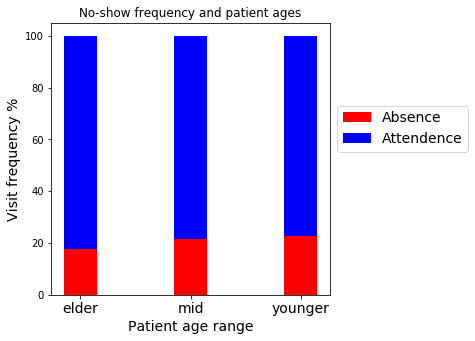

In [40]:
# creat a stacked bar plot
head = ['Absence','Attendence']
no_show = (elder_no_show, mid_no_show, younger_no_show)
show = (elder_show, mid_show, younger_show )

# define the number of bars and the width of bars
ind = np.arange(3)
width = 0.3

# get a figure and define the figure size
fig = plt.gcf()
fig.set_size_inches(5, 5)

p1 = plt.bar(ind, no_show, width, color='r')
p2 = plt.bar(ind, show, width, bottom=no_show, color='b')

# assign the label names for x, y, title and legend for the bar plot
plt.xticks(ind, ('elder', 'mid','younger'),fontsize=14)
plt.ylabel('Visit frequency %', fontsize=14)
plt.xlabel('Patient age range',fontsize=14)
plt.title('No-show frequency and patient ages')
plt.legend((p1[0],p2[0]),(head[0],head[1]),fontsize=14,loc='lower left',bbox_to_anchor=(1, 0.5));


#### conclution 3
- The elder patients with an age greater or equal to 37 are more liky to attend their scheduled appointment as compared to mid- or younger age patients.

### Research Question 4 (It exists a correlation between aging and occurances of health issues?)
- we use pair plot to visualize a relationship between aging and the occurance of diseases such as diabetes, hypertension and alcoolism from this data set.

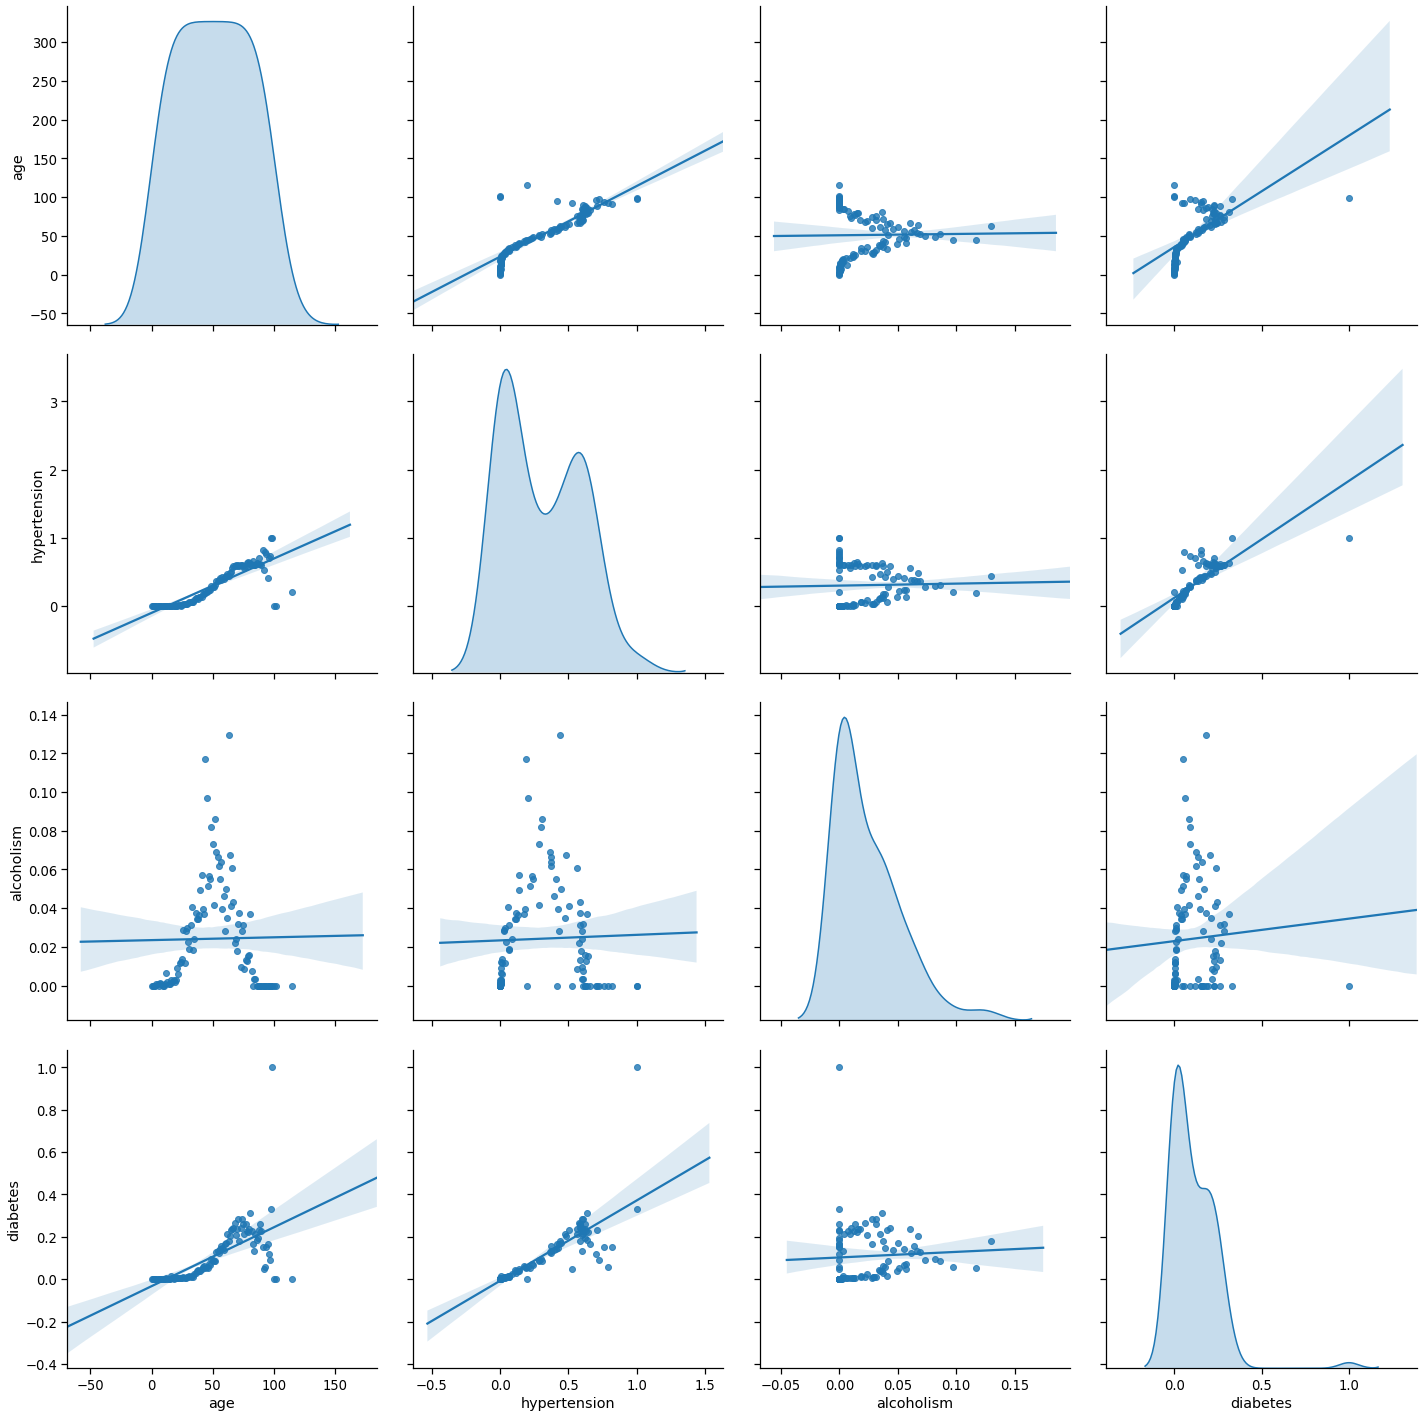

In [41]:
# use groupby function to split the data into groups based on ages, then determine the average values for each numeric columns.
patient = df.groupby('age',as_index=False).mean()

# convert the column 'age' to float64 prior to make a pair plot
patient['age'] = patient['age'].astype('float64')

# adjust the plot context parameters such as axis scale,linewidth
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

# use seaborn pariplot function to create the scatter figure with selected columns labeled as 'age', 'hypertension','alcoholism' and 'diabetes'
scatter_matrix = sns.pairplot(patient, vars=['age', 'hypertension','alcoholism','diabetes'],diag_kind="kde", kind="reg",palette="husl", height=5) # add a linear regression fittig line with kind="reg".

#### Conclusion 3

- a positive correlation between patient age and their diabetes occurance

- a positive correlation between patient age and their hypertension occurance

- no correlation between patient age and their alcoholism occurance

#### Final conclusions

- About 43% of total patients visited the hosiptial for mutiple times.

- The patients without the scholarship are more likly to show up compared to the group received the scholarship.

- The elder patients with an age greater or equal to 37 are more liky to attend their scheduled appointment as compared to mid- or younger age patients.

- A positive correlation between aging and the occurance of two diseases including diabetes and hypertension.

- A positive correlation between diabetes and hypertension in patients.

#### Limitations and missing information


- It will be interested to know if the occurence of diabetes and hypertension is higher in healthy people as compared to those patient data.

